# Laboratorio de regresión - 3

## Significancia de factores

|                |   |
:----------------|---|
| **Nombre**     |   |
| **Fecha**      |   |
| **Expediente** |   |

Descarga el archivo de publicidad y carga los datos (Advertising.csv).

In [2]:
import pandas as pd
df=pd.read_csv("Advertising.csv")

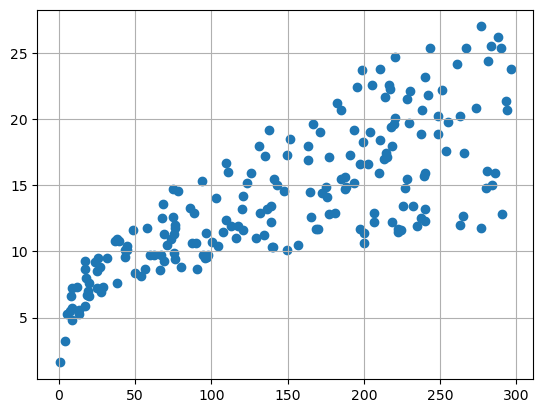

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.scatter(df["TV"],df["sales"])
plt.grid()
plt.show()

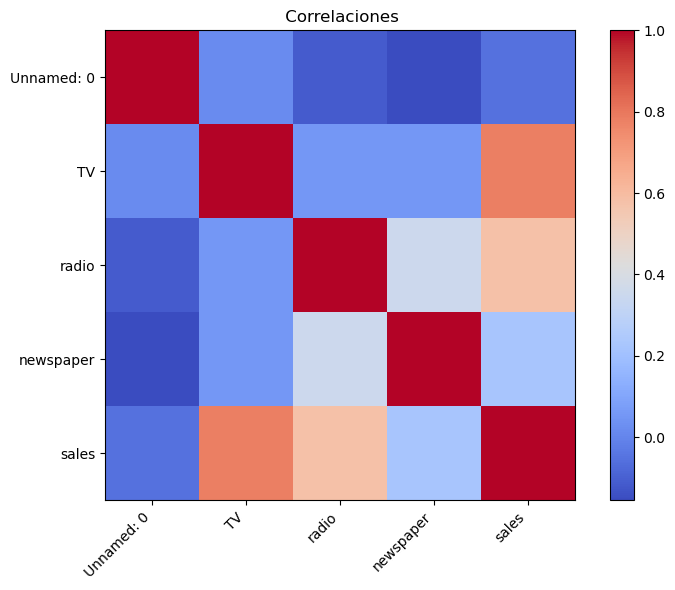

In [5]:
import numpy as np
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
im = plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(im)
labels = corr_matrix.columns
num_vars = len(labels)
plt.xticks(np.arange(num_vars), labels, rotation=45, ha='right')
plt.yticks(np.arange(num_vars), labels)
plt.title(" Correlaciones")
plt.tight_layout()
plt.show()


In [8]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


**¿Hay alguna relación entre el presupuesto para publicidad y las ventas?**

Nuestra primera meta debe ser determinar si hay evidencia en los datos de que haya una asociación entre estas variables.


- ¿Por qué? ¿Qué resultaría si nos diéramos cuenta de la falta de relación entre el presupuesto de publicidad y las ventas?

In [11]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
# Transformar X de vector renglon a vector columna
x=df["TV"].values


y=df["sales"].values
x_reshaped = np.array(x).reshape(-1, 1)

# Modelo
model = LinearRegression()
model.fit(x_reshaped, y)

# Predicciones
y_pred = model.predict(x_reshaped)

# Calcular R2
r2 = r2_score(y, y_pred)
def regresiones(x, y, grados):
    resultados = [] #Lista vacia para almacenar resultados
    for g in grados:
        poly = PolynomialFeatures(degree=g) # degree = grado maximo de la funcion, bias=columna de unos para b0
        x_poly = poly.fit_transform(x_reshaped) #Ajuste y transformacion (en este caso cada x elevada a su grado) 
        modelo = LinearRegression().fit(x_poly, y)#La regresion se entrenara con datos de entrada x_poly y regresso un valor y
        y_pred = modelo.predict(x_poly)
        r2 = r2_score(y, y_pred)
        resultados.append({
            "Grado": g,
            "Intercepto": round(modelo.intercept_, 4),
            "Coeficientes": [round(coef, 4) for coef in modelo.coef_],
            "R2": r2
        })
    df_resultados = pd.DataFrame(resultados)
    return df_resultados



grados = [1]
df_resultados =regresiones(x, y, grados)
df_resultados["Coeficientes"]=df_resultados["Coeficientes"].round(4)
df_resultados



,Grado,Intercepto,Coeficientes,R2
0,1,7.0326,"[0.0, 0.0475]",0.611875


**¿Qué tan fuerte es esta relación?**
Asumiendo que existe esta relación, ¿nos sirve conocer el impacto que tiene invertir en publicidad en las ventas?

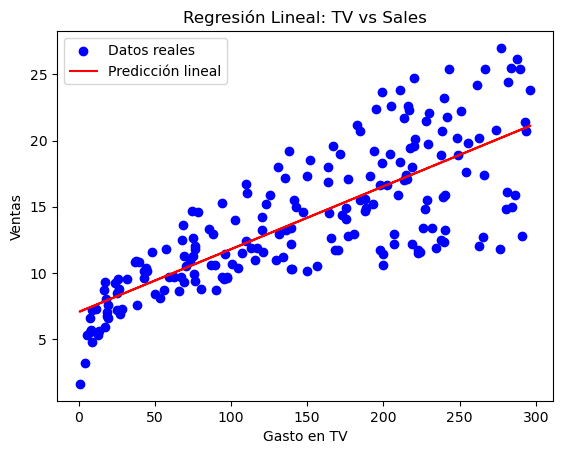

In [14]:
plt.scatter(x, y, color='blue', label='Datos reales')  
plt.plot(x, y_pred, color='red', label='Predicción lineal')  
plt.title('Regresión Lineal: TV vs Sales')
plt.xlabel('Gasto en TV')
plt.ylabel('Ventas')
plt.legend()
plt.show()

**¿Cuáles medios están asociados con las ventas? ¿Qué tan grande es la asociación entre un medio específico y las ventas?**

Hay 3 medios distintos en los datos. ¿Sirve invertir en los 3? ¿Conviene más invertir sólo en uno?

**¿Qué tan seguros estamos de que podríamos predecir ventas futuras?**

**¿La relación es lineal?**

**¿Hay sinergia entre estos medios?**

Puede ser que gastar \\$50,000 en publicidad y otros \\$50,000 en radio es mejor opción que gastar \\$100,000 en televisión. A esto le llamamos efecto de interacción.

Podemos usar regresión lineal para responder todas estas preguntas.

Realiza una regresión lineal:

$$ \text{ventas} \approx \beta_0 + (\beta_1)(\text{TV})$$

El R2 no me esta gustando, la funcion parece ser logaritmica pero no se si haya tema con la homosedasticidad

In [19]:
df_resultados

,Grado,Intercepto,Coeficientes,R2
0,1,7.0326,"[0.0, 0.0475]",0.611875


### Verificando la precisión de nuestros coeficientes estimados

Recuerda que en el mundo real hay ruidos y errores de medición. Siempre se asume que la verdadera relación entre $X$ y $Y$ es $$Y = \beta_0 + \beta_1 X + \epsilon$$

Se asume que el término de error es independiente de $X$ (el error siempre es el mismo sin importar el valor de $X$). Este modelo describe a la *línea de regresión de la población*, que es la mejor aproximación de la verdadera relación entre $X$ y $Y$. Cuando usamos mínimos cuadrados encontramos la *línea de mínimos cuadrados*.

¿Cuál es la diferencia entre población y muestra?

La población es una colección de todos los conjuntos que existen,es el espacio muestral &Omega; es decir todos los posibles conjuntos estan dentro de la colección $$ \Omega = \{ \omega_1, \omega_2, \omega_3, \ldots, \omega_n \} $$

La muestra $\omega$ es un subconjunto de la población &Omega; que se selecciona para su estudio dada su disponibilidad y su tamaño debe ser estadisticamente significativo para que los resultados del estudio tengan validez. $$ \omega = \{ s_1, s_2, s_3, \ldots, s_n \} $$

¿Cuál crees que sea la diferencia entre hacer una regresión con todos los datos de la población y una muestra de ella?

Mientras mayor muestra tendiendo a poblacion mayor es la precicion del modelo

La línea de regresión de la población no se puede observar. El concepto de comparar estas líneas es una extensión natural del acercamiento estadístico estándar de usar información de una muestra para estimar características de una población grande.

Imagina que quieres encontrar la altura promedio de un mexicano $\mu$. Medir a todos y cada uno de los mexicanos en situaciones similares, con la misma regla, mismo operador, y otras incontables formas de minimizar la variación de la medida es una tarea imposible. Lo que podemos asumir es que $\hat{\mu} = \bar{y}$. La media poblacional y la media muestral son diferentes, pero la media muestral es usualmente un buen estimado.

De la misma manera, como no contamos con el 100% de la información para hacer una regresión, los coeficientes $\beta_0$ y $\beta_1$ son desconocidos. Podemos estimarlos usando mínimos cuadrados, encontrando $\hat{\beta_0}$ y $\hat{\beta_1}$. Puede que las muestras que tengamos en ese momento estén un poco por encima de la media, pero otras muestras en otro momento puede que estén debajo de la media. En general, esperamos que el promedio de las aproximaciones $\hat{\mu}$ aproxime a $\mu$.

Esto lleva a la pregunta: ¿qué tan cercanos son nuestros coeficientes estimados a los verdaderos coeficientes? Utilizamos el concepto de error estándar para evaluar esto.

$$ \text{Var}(\hat{\mu})=\text{SE}(\hat{\mu})^2 = \frac{\sigma^2}{n} $$

Donde $\sigma$ es la desviación estándar de cada una de las observaciones $y_i$ de $Y$. El error estándar nos dice la cantidad promedio que el estimado difiere del valor verdadero. Podemos ver en la fórmula que entre más observaciones tengamos el error se hace más pequeño. Las fórmulas para errores estándar de $\hat{\beta_0}$ y $\hat{\beta_1}$ son:

$$ \text{SE}(\hat{\beta_0})^2 = \sigma^2 [\frac{1}{n} + \frac{\bar{x}^2}{\sum_{i=1}^n (x_i - \bar{x})^2}]$$

$$ \text{SE}(\hat{\beta_1})^2 = \frac{\sigma^2}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

$$ \sigma^2 = \text{Var}(\epsilon) = \text{RSE}^2 = \frac{\text{RSS}}{n-p}$$

Para que estas fórmulas sean validas asumimos que los errores $\epsilon_i$ tienen varianza común $\sigma^2$ y que no están correlacionados.

Calcula los errores estándar de los coeficientes

In [33]:
df_resultados

,Grado,Intercepto,Coeficientes,R2
0,1,7.0326,"[0.0, 0.0475]",0.611875


In [35]:
x

array([230.1,  44.5,  17.2, 151.5, 180.8,   8.7,  57.5, 120.2,   8.6,
       199.8,  66.1, 214.7,  23.8,  97.5, 204.1, 195.4,  67.8, 281.4,
        69.2, 147.3, 218.4, 237.4,  13.2, 228.3,  62.3, 262.9, 142.9,
       240.1, 248.8,  70.6, 292.9, 112.9,  97.2, 265.6,  95.7, 290.7,
       266.9,  74.7,  43.1, 228. , 202.5, 177. , 293.6, 206.9,  25.1,
       175.1,  89.7, 239.9, 227.2,  66.9, 199.8, 100.4, 216.4, 182.6,
       262.7, 198.9,   7.3, 136.2, 210.8, 210.7,  53.5, 261.3, 239.3,
       102.7, 131.1,  69. ,  31.5, 139.3, 237.4, 216.8, 199.1, 109.8,
        26.8, 129.4, 213.4,  16.9,  27.5, 120.5,   5.4, 116. ,  76.4,
       239.8,  75.3,  68.4, 213.5, 193.2,  76.3, 110.7,  88.3, 109.8,
       134.3,  28.6, 217.7, 250.9, 107.4, 163.3, 197.6, 184.9, 289.7,
       135.2, 222.4, 296.4, 280.2, 187.9, 238.2, 137.9,  25. ,  90.4,
        13.1, 255.4, 225.8, 241.7, 175.7, 209.6,  78.2,  75.1, 139.2,
        76.4, 125.7,  19.4, 141.3,  18.8, 224. , 123.1, 229.5,  87.2,
         7.8,  80.2,

In [37]:
type(df_resultados["Coeficientes"])

pandas.core.series.Series

In [42]:
n = len(y)
p = 2
rss=np.sum((y_pred - y)**2)
rse2=rss/(n-p)
rse2

10.618841328946218

In [46]:
seb1=np.sqrt(rse2/(np.sum((x-x.mean())**2)))
seb0=np.sqrt(rse2*(1/n+x.mean()**2/np.sum((x-x.mean())**2)))
intervalob0=[df_resultados["Intercepto"][0]-(2*(np.sqrt(seb0))),df_resultados["Intercepto"][0]+(2*(np.sqrt(seb0)))]
intervalob1=[df_resultados["Coeficientes"][0][1]-(2*(np.sqrt(seb1))),df_resultados["Coeficientes"][0][1]+(2*(np.sqrt(seb1)))]

intervalob0

[5.679318151642493, 8.385881848357508]

In [48]:
intervalob1

[-0.05624212621296848, 0.15124212621296848]

In [50]:
seb1,seb0

(0.0026906071877968707, 0.4578429402734785)

Estos errores se pueden usar para calcular intervalos de confianza. Un intervalo de confianza del $95\%$ se define como un rango de valores en el cuál se encuentra el desconocido valor verdadero con un $95\%$ de probabilidad.

Otra forma de verlo es que si tomamos muestras repetidas y construimos un intervalo de confianza para cada una, el $95\%$ de los intervalos creados van a contener el valor verdadero. Para la regresión el intervalo de confianza del $95\%$ toma la forma:

$$ \hat{\beta_j} \pm 2\text{SE}(\hat{\beta_j})$$

Calcula los intervalos de confianza para los coeficientes estimados:

In [54]:
b0=df_resultados["Intercepto"][0]
b1=df_resultados["Coeficientes"][0][1]

In [56]:
# Intervalos de confianza al 95%
conf_int_b0 = (b0 - 2 * seb0, b0 + 2 * seb0)
conf_int_b1 = (b1 - 2 * seb1, b1 + 2 * seb1)

# Crear DataFrame con resultados
intervalos_confianza = pd.DataFrame({
    "Coeficiente": ["Intercepto (b0)", "Coeficiente TV (b1)"],
    "Estimación": [b0, b1],
    "Error Estándar": [seb0, seb1],
    "Intervalo Confianza 95%": [conf_int_b0, conf_int_b1]
})

In [58]:
intervalos_confianza

,Coeficiente,Estimación,Error Estándar,Intervalo Confianza 95%
0,Intercepto (b0),7.0326,0.457843,"(6.116914119453043, 7.948285880546957)"
1,Coeficiente TV (b1),0.0475,0.002691,"(0.04211878562440626, 0.05288121437559374)"


Los errores estándar también se usan para realizar pruebas de hipótesis. La prueba de hipótesis más común es probar la hipótesis nula de:

$$ H_0: \text{No hay relación entre } X \text{ y } Y \ \ \ \ (\beta_1=0)$$

contra la hipótesis alternativa:
$$ H_0: \text{Hay alguna relación entre } X \text{ y } Y \ \ \ (\beta_1 \neq 0)$$

Explica con tus palabras el significado de la hipótesis nula y la hipótesis alternativa.

La hipotesis alterna Ha es la hipotesis o postulado que contrario deseas probar originalmente
La hipotesis nula H0 es la hipotesis que afirmas antes de probar 

Para probar la hipótesis nula debemos determinar si nuestro estimado $\hat{\beta_1}$ de $\beta_1$ está lo suficientemente alejado de cero para que podamos decir con confianza que este valor no es cero. 

¿Qué tan lejos? Depende de qué tanta confianza tengamos en el estimado encontrado. Si nuestro error estándar es pequeño y nuestro estimado está alejado de cero podríamos decir que hay muy poca probabilidad de que el valor verdadero sea 0. En cambio, si nuestro error estándar es grande y nuestro estimado está muy cerca de cero, entonces podrías ser que el valor verdadero sea cero y que no haya relación entre las variables.

Se calcula un *estadístico t* dado por
$$ t = \frac{\hat{\beta_j} - \mu}{\text{SE}(\hat{\beta_j})} $$

donde $\mu$ es el valor contra el que queremos probar.

Calcula el estadístico t para tus coeficientes estimados, usando como referencia la prueba de hipótesis.

In [67]:
t0 = b0/seb0
t1 = b1/seb1
t0,t1

(15.360289263823292, 17.654007695896354)

La distribución t tiene forma de campana y se parece bastante a la distribución normal cuando $n > 30$. Ya sólo es cuestión de calcular la probabilidad de observar cualquier número tal que su valor absoluto sea igual o mayor que el valor absoluto del estadístico t calculado. En otras palabras:
$$ P(|x| \geq |t|) $$

A esta probabilidad la llamamos *p-value*. Un *p-value* pequeño indica que es poco probable que exista por puro azar una relación significativa entre predictor y respuesta, en caso de que no haya una asociación real entre predictor y respuesta. En otras palabras, el *p-value* te dice la probabilidad de que parezca que hay relación cuando no la hay.

Si el *p-value* es pequeño, inferimos que sí hay una asociación entre el predictor y la respuesta, y **rechazamos la hipótesis nula**.
  

¿Qué tan pequeño? Depende de la aplicación. Un valor muy común es del $5\%$.

Utiliza el siguiente código para calcular el *p-value* para tus coeficientes

`from scipy import stats`

`p_bj = 2*(1 - stats.t.cdf(np.abs(t_bj), n-p))`

In [69]:
from scipy import stats

In [71]:
p_b0 = 2*(1 - stats.t.cdf(np.abs(t0), n-p))
p_b1 = 2*(1 - stats.t.cdf(np.abs(t1), n-p))
p_b0,p_b1

(0.0, 0.0)

¿Se rechaza la hipótesis nula? ¿Qué significa?

Si, se acepta la Ha dado el p value en 0

t0 y t1 son estadisticamente significativos

Realiza otras dos regresiones. Ya tienes hecha la regresión de ventas dado el gasto en publicidad de TV. Realiza la regresión para gastos en radio y gastos en periódico. Organiza las respuestas para que debajo de esta celda se tenga:
- Título de regresión
- Coeficientes estimados
- Errores estándar de los coeficientes
- Intervalos de confianza
- Estadísticos t
- p-values
- Observaciones

## Realizamos una funcion donde usaremos statsmodels y cumpliremos los requerimientos en nuestra salida

In [118]:
# Función para realizar regresión y generar resultados
def regresion(variable):
    X = df[[variable]]
    y = df["sales"]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    
    # Gráfico de regresión
    plt.figure(figsize=(8,6))
    plt.scatter(df[variable], y, label='Datos reales')
    plt.plot(df[variable], model.predict(X), color='red', label='Regresión lineal')
    plt.xlabel(f"Gasto en {variable.capitalize()}")
    plt.ylabel("Ventas")
    plt.title(f"Regresión Lineal: {variable.capitalize()} vs Sales")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Intervalo de confianza en lista
    conf_int = model.conf_int().loc[variable].tolist()
    
    # Tabla de resultados usando dict comprehension
    metricas = ["Coeficiente", "Intercepto", "Error Estándar", "Intervalo de Confianza", "Estadístico t", "p-value", "R2"]
    valores = [model.params[variable], model.params["const"], model.bse[variable], conf_int, model.tvalues[variable], model.pvalues[variable], model.rsquared]
    resultados = {m: [v] for m, v in zip(metricas, valores)}
    
    return pd.DataFrame(resultados)

# Regresion Radio vs Sales 

Regresión: Gasto en Radio


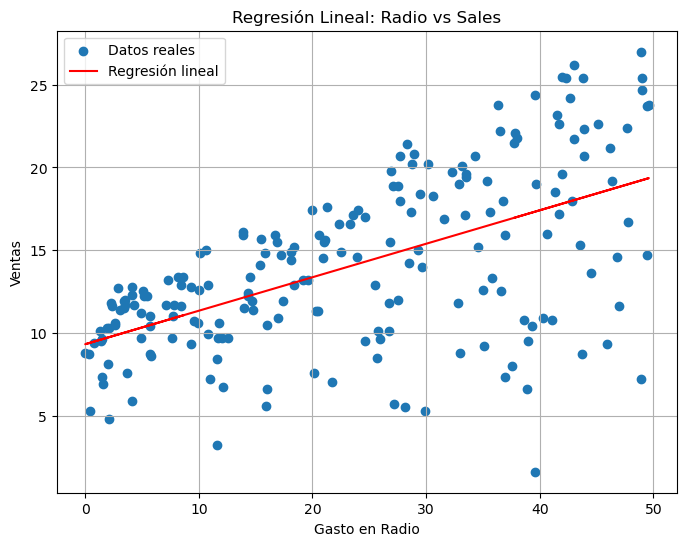

,Coeficiente,Intercepto,Error Estándar,Intervalo de Confianza,Estadístico t,p-value,R2
0,0.202496,9.311638,0.020411,"[0.162244330504919, 0.24274723627996075]",9.920765,4.354966e-19,0.332032


In [120]:
print("Regresión: Gasto en Radio")
regresion("radio")

# Regresion Radio vs Sales 

Regresión: Gasto en Periodico


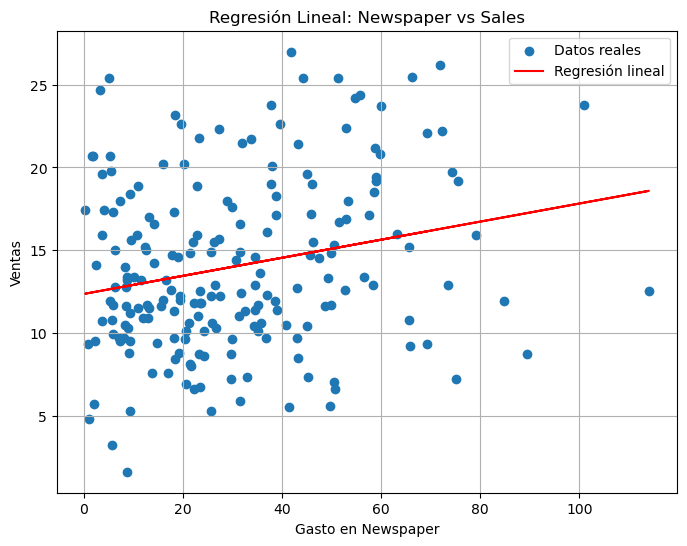

,Coeficiente,Intercepto,Error Estándar,Intervalo de Confianza,Estadístico t,p-value,R2
0,0.054693,12.351407,0.016576,"[0.02200548522438129, 0.0873807117201652]",3.299591,0.001148,0.05212


In [124]:
print("Regresión: Gasto en Periodico")
regresion("newspaper")

## Regresión lineal múltiple

En lugar de hacer una regresión para cada factor independiente, quizás se puede extender el modelo para que tenga varios factores dentro:

$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon $$

Para nuestro ejemplo de publicidad:

$$ \text{sales} = \beta_0 + \beta_1 (\text{TV}) + \beta_2 (\text{radio}) + \beta_3 (\text{newspaper}) + \epsilon $$

Utiliza la librería `statsmodels` para realizar la regresión. Por defecto la librería statsmodels no toma en cuenta el intercepto ($\beta_0$), por lo que se tendrá que agregar una columna de unos de tamaño *n* a la matriz X.

`import statsmodels.api as sm`

`ols = sm.OLS(Y, X)`

`results = ols.fit()`

`results.summary()`

In [129]:
n=len(y)
x_TV=np.reshape(df["TV"],[-1,1])
x_R=np.reshape(df["radio"],[-1,1])
x_N=np.reshape(df["newspaper"],[-1,1])

ones=np.ones([n,1])
X=np.hstack((ones,x_TV,x_R,x_N))
import statsmodels.api as sm
ols=sm.OLS(y,X)
osl_results=ols.fit()
osl_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 02 Feb 2025   Prob (F-statistic):           1.58e-96
Time:                        16:35:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
x1             0.0458      0.001     32.809      0.000       0.043       0.049
x2             0.1885      0.009     21.893      0.000       0.172       0.206
x3            -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

¿Qué diferencias puedes observar entre los *p-values* de una regresión múltiple y los encontrados en las regresiones simples? ¿Por qué crees que existen estas diferencias?

Puede ser que sean  mayores porque consideran las relaciones de las 3 variables en conjunto y puede que una pierda significancia por el aumento de la significancia de la otra, por ende hay que ver la multicolinealidad 

## Referencia

James, G., Witten, D., Hastie, T., Tibshirani, R.,, Taylor, J. (2023). An Introduction to Statistical Learning with Applications in Python. Cham: Springer. ISBN: 978-3-031-38746-3

## Addendum

Para calcular los *p-values* de los parámetros sin `statsmodels`:
1. Calcular RSS
2. Calcular RSE
3. `var_beta = np.linalg.inv(X.T @ X) * rse**2` (X con columna de intercepto)
4. `std_beta = np.sqrt(var_beta.diagonal())` El orden de los valores corresponde al orden de los factores en las columnas de la matriz $X$.
5. Calcular *estadístico t*
6. Calcular *p-value*